<div class="span5 alert alert-success">
<p> This workbook compares the Decision Tree, Random Forest, Ridge, and Lasso algorithms via box plots to assess
which algorithm appears to be performing the best</p>
</div>

<div class="span5 alert alert-success">
<p> Prep </p>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\MachineLearningData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\MachineLearningData


In [3]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<div class="span5 alert alert-success">
<p> Compare the algorithms using zip codes (count: 21) with 2009 - 2017 housing data available </p>
</div>

In [4]:
dfin = pd.read_csv('project1_machine_learning_input_starting_2009.csv')

df = dfin[['pop_density','med_household_income','Has_Windfarm', 'percent_higher_ed',
              'percent_2010_change','percent_2011_change','percent_2012_change',
              'percent_2013_change','percent_2014_change','percent_2015_change','percent_2016_change',
              'percent_2017_change','percent_2018_change']]

print('Model 2009 Results')


Model 2009 Results


Decision Tree: -1.903724 (1.232324)
Random Forest: -1.070177 (0.906068)
Ridge: -3.063320 (2.793926)
Lasso: -1.641426 (1.587947)


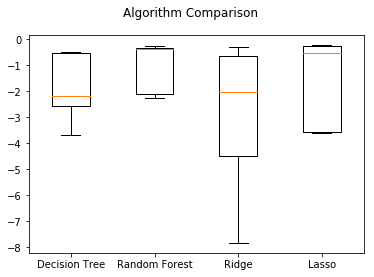

In [7]:
#Setup the array
array = df.values
X = array[:,0:12]
Y = array[:,12]

# prepare models
models = []
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=5, random_state=7)
    #cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    cv_results = cross_val_score(model, X, Y, cv=kfold)

    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<div class="span5 alert alert-success">
<b> Observations: </b>
    <p>
    •	All the algorithms produce a similar top, but Random Forest and Lasso appear to be the best models to use for further analysis.  They have the highest top and a much tighter range than Ridge or Decision Tree. <br><br>
•	Random Forest’s plot is short and Lasso has very short whiskers indicating a high level of agreement on home value predictions across zip codes.<br><br>
•	Height of the Decision Tree and Ridge plots are similar, and are much greater than Random Forest and Lasso.  This lends further support to not continuing with the Decision Tree and Ridge algorithms.<br><br>
•	The medians of Decision Tree, Random Forest, and Lasso are very similar, but the size of their box plot varies, showing a much higher variance in the Decision Tree results.  

</p>
</div>